In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
#from pandas_profiling import ProfileReport
plt.style.use('fivethirtyeight')

In [164]:
parser = lambda date: pd.datetime.strptime(date, '%Y-%m%-dTH%:M%:%s')
df = pd.read_csv('~/code/knowledge/content/ryanair/cloud-reports/data/csp/rooms.csv', parse_dates=True, index_col='@timestamp')

In [165]:
df.shape

(237, 21)

In [166]:
df.columns

Index(['application', 'project', 'projectGroup', 'message', 'csp.fe-app',
       'csp.document-uri', 'csp.referrer', 'csp.violated-directive',
       'csp.effective-directive', 'csp.disposition', 'csp.blocked-uri',
       'csp.line-number', 'csp.column-number', 'csp.source-file',
       'csp.status-code', 'csp.script-sample', '@id', '@log_group',
       '@log_stream', '@vpc', '@env'],
      dtype='object')

<AxesSubplot:>

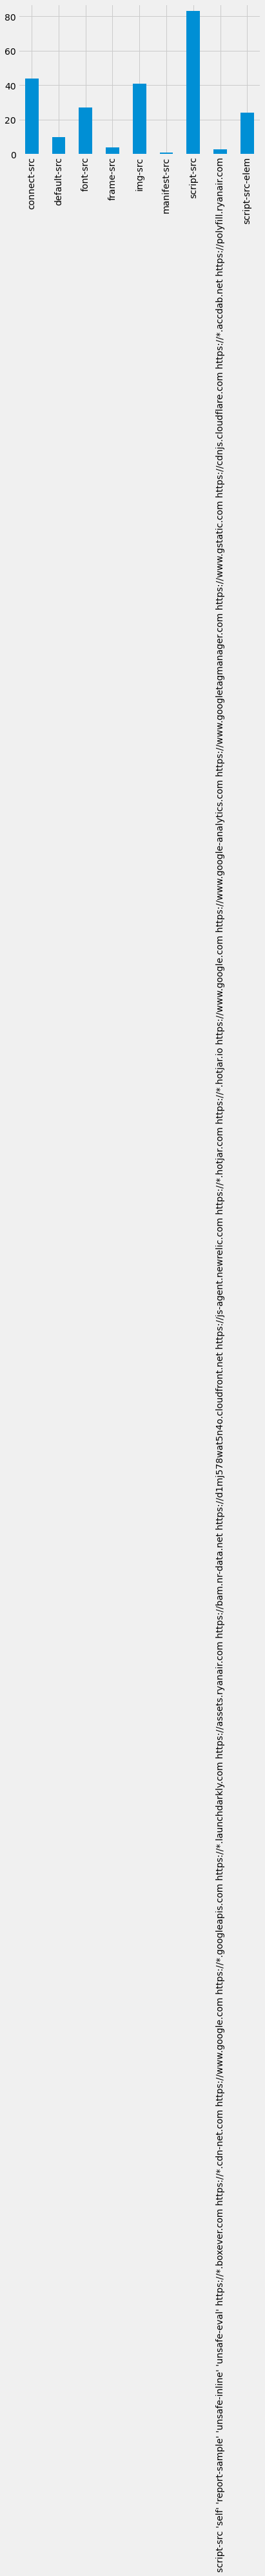

In [167]:
df.groupby('csp.violated-directive').size().plot(kind="bar", xlabel="")

In [168]:
df.groupby(['csp.blocked-uri']).size().sort_values(ascending=False).reset_index()

,csp.blocked-uri,0
0,https://www.google-analytics.com/analytics.js,11
1,data,10
2,https://asrvvv-a.akamaihd.net/get?addonname=Ge...,8
3,https://b.1p1eqpotato.com/ib/?p=1,8
4,https://cdncache-a.akamaihd.net/i/items/z7b85/...,8
...,...,...
108,https://qdatasales.com/?events=W1siaHR0cHMlM0E...,1
109,https://s.pmddby.com/pops?c=aHR0cHMlM0EvL3d3dy...,1
110,https://s.pmddby.com/pops?c=aHR0cHMlM0EvL3d3dy...,1
111,https://s.pmddby.com/pops?c=aHR0cHMlM0EvL3d3dy...,1


In [169]:
df.groupby(['csp.blocked-uri', 'csp.violated-directive', 'csp.source-file']).size().sort_values(ascending=False).reset_index().iloc[0:100]

,csp.blocked-uri,csp.violated-directive,csp.source-file,0
0,data,default-src,undefined,10
1,https://www.google-analytics.com/analytics.js,script-src-elem,undefined,9
2,https://static3.avast.com/1000947/web/o/f/400/...,font-src,undefined,6
3,https://static3.avast.com/1000947/web/o/f/700/...,font-src,undefined,6
4,https://static3.avast.com/1000947/web/o/f/700/...,font-src,undefined,6
5,https://static3.avast.com/1000947/web/o/f/400/...,font-src,undefined,6
6,https://asrvvv-a.akamaihd.net/get?addonname=Ge...,script-src,https://assets.ryanair.com/shared-scripts/nr-l...,4
7,https://asrvvv-a.akamaihd.net/get?addonname=Ge...,script-src,undefined,4
8,https://m35.prod2016.com/QualityCheck/ga.js,script-src,https://assets.ryanair.com/shared-scripts/nr-l...,4
9,https://cdncache-a.akamaihd.net/sub/b156ae9/35...,script-src,https://assets.ryanair.com/shared-scripts/nr-l...,4


In [170]:
 pd.set_option('display.max_rows', 100)
df['csp.blocked-uri'].value_counts().reset_index().iloc[0:100]

,index,csp.blocked-uri
0,https://www.google-analytics.com/analytics.js,11
1,data,10
2,https://asrvvv-a.akamaihd.net/get?addonname=Ge...,8
3,https://asrvvv-a.akamaihd.net/get?addonname=Ge...,8
4,https://cdncache-a.akamaihd.net/i/items/z7b85/...,8
5,https://b.1p1eqpotato.com/ib/?p=1,8
6,https://static3.avast.com/1000947/web/o/f/400/...,6
7,https://static3.avast.com/1000947/web/o/f/700/...,6
8,https://static3.avast.com/1000947/web/o/f/400/...,6
9,https://static3.avast.com/1000947/web/o/f/700/...,6


In [171]:
# Working with 

df2 = df['csp.blocked-uri'].fillna(' ')
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 300):  # more options can be specified also
    print(df.loc[df['csp.blocked-uri'].fillna(' ').str.contains('eval')].iloc[0:20])

Empty DataFrame
Columns: [application, project, projectGroup, message, csp.fe-app, csp.document-uri, csp.referrer, csp.violated-directive, csp.effective-directive, csp.disposition, csp.blocked-uri, csp.line-number, csp.column-number, csp.source-file, csp.status-code, csp.script-sample, @id, @log_group, @log_stream, @vpc, @env]
Index: []


In [172]:
 df.loc[df['csp.blocked-uri'].str.contains('https://www.google-analytics.com/analytics.js')]['csp.referrer'].apply()

TypeError: apply() missing 1 required positional argument: 'func'

In [ ]:
dff = pd.read_csv('~/code/knowledge/content/ryanair/cloud-reports/data/csp/homepage.csv')

In [ ]:
dff.groupby(['csp.blocked-uri', 'csp.column-number', 'csp.line-number']).size().sort_values(ascending=False).reset_index().iloc[0:20]

In [ ]:
dff2 = dff.